**LANE DETECTION**


In [ ]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def conv2d_block(input_tensor,n_filters,kernel_size=3):
  x=input_tensor
  for i in range(2):
    x=tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),padding='same')(x)
    x=tf.keras.layers.Activation('relu')(x)
  return x

In [ ]:
def encoder_block(inputs,n_filter,pool_size,dropout):
  f=conv2d_block(input_tensor=inputs,n_filters=n_filter)
  p=tf.keras.layers.MaxPooling2D(pool_size)(f)
  p=tf.keras.layers.Dropout(dropout)(p)
  return f,p

In [ ]:
def encoder(inputs):
  f1,p1=encoder_block(inputs,n_filter=64,pool_size=(2,2),dropout=0.3)
  f2,p2=encoder_block(p1,n_filter=128,pool_size=(2,2),dropout=0.3)
  f3,p3=encoder_block(p2,n_filter=256,pool_size=(2,2),dropout=0.3)
  f4,p4=encoder_block(p3,n_filter=512,pool_size=(2,2),dropout=0.3)
  return p4,(f1,f2,f3,f4)

In [ ]:
def bottleneck(inputs):
  bottle_neck=conv2d_block(inputs,n_filters=1024)
  return bottle_neck

In [ ]:
def decoder_block(inputs,conv_output,n_filter,kernel_size,strides,dropout):
  u=tf.keras.layers.Conv2DTranspose(n_filter,kernel_size,strides=strides,padding='same')(inputs)
  c=tf.keras.layers.concatenate([u,conv_output])
  c = tf.keras.layers.Dropout(dropout)(c)
  c=conv2d_block(c,n_filter,kernel_size=3)
  return c

In [ ]:
def decoder(inputs,convs):
  f1,f2,f3,f4=convs
  c6=decoder_block(inputs,f4,n_filter=512,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c7=decoder_block(c6,f3,n_filter=256,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c8=decoder_block(c7,f2,n_filter=128,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c9=decoder_block(c8,f1,n_filter=64,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  outputs=tf.keras.layers.Conv2D(1,kernel_size=(1,1),activation='relu')(c9)
  return outputs

In [ ]:
def unet():
  inputs=tf.keras.layers.Input(shape=(80,160,3,))
  encoder_output,convs=encoder(inputs)
  bottle_neck=bottleneck(encoder_output)
  outputs=decoder(bottle_neck,convs)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model


In [ ]:
def main():
  train_images=np.asarray(pickle.load(open("/content/full_CNN_train.p","rb")),dtype=np.float32)
  labels = np.asarray(pickle.load(open("/content/full_CNN_labels (1).p", "rb" )),dtype=np.float32)
  train_images=train_images/255.0
  labels=labels
  train_images, labels = shuffle(train_images, labels)
  X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.3)
  model = unet()
  model.compile(optimizer='Adam', loss='mse',metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=20,validation_data=(X_val, y_val))
  model.save('full_CNN_model.h5')
  model.summary()

In [ ]:
if __name__ == '__main__':
  main()


Epoch 1/20
280/280 [==============================] - 144s 442ms/step - loss: 4541.0215 - accuracy: 0.6425 - val_loss: 2291.8345 - val_accuracy: 0.6045
Epoch 2/20
280/280 [==============================] - 117s 417ms/step - loss: 1261.9279 - accuracy: 0.7337 - val_loss: 784.0836 - val_accuracy: 0.7502
Epoch 3/20
280/280 [==============================] - 117s 417ms/step - loss: 551.5714 - accuracy: 0.7923 - val_loss: 486.1933 - val_accuracy: 0.7937
Epoch 4/20
280/280 [==============================] - 117s 417ms/step - loss: 417.5916 - accuracy: 0.8025 - val_loss: 358.9798 - val_accuracy: 0.8034
Epoch 5/20
280/280 [==============================] - 117s 417ms/step - loss: 369.1750 - accuracy: 0.8067 - val_loss: 317.3764 - val_accuracy: 0.8076
Epoch 6/20
280/280 [==============================] - 117s 417ms/step - loss: 346.3092 - accuracy: 0.8049 - val_loss: 315.1044 - val_accuracy: 0.7906
Epoch 7/20
280/280 [==============================] - 117s 417ms/step - loss: 322.1720 - accuracy

Prediction

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/lane.jpeg')
print(image)

[[[123 128 137]
  [114 119 128]
  [110 115 124]
  ...
  [ 59 145 135]
  [ 40 126 116]
  [ 64 150 140]]

 [[120 125 134]
  [111 116 125]
  [107 112 121]
  ...
  [ 70 153 144]
  [ 51 137 127]
  [ 72 155 146]]

 [[116 121 130]
  [106 111 120]
  [103 108 117]
  ...
  [ 59 140 131]
  [ 44 127 118]
  [ 58 139 130]]

 ...

 [[ 82  91 100]
  [ 84  93 102]
  [ 86  95 104]
  ...
  [122 121 131]
  [122 121 131]
  [122 121 131]]

 [[ 79  88  97]
  [ 86  95 104]
  [ 95 104 113]
  ...
  [123 122 132]
  [123 122 132]
  [123 122 132]]

 [[ 94 103 112]
  [ 89  98 107]
  [ 82  91 100]
  ...
  [119 118 128]
  [119 118 128]
  [119 118 128]]]


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/full_CNN_model (1).h5')

In [ ]:
small_img = cv2.resize(image, (160, 80))
small_img = np.array(small_img)
small_img = small_img[None,:,:,:]

In [ ]:
prediction = model.predict(small_img)

In [ ]:
prediction

array([[[[  0.     ],
         [  0.     ],
         [  0.     ],
         ...,
         [  0.     ],
         [  0.     ],
         [  0.     ]],

        [[  0.     ],
         [  0.     ],
         [  0.     ],
         ...,
         [  0.     ],
         [  0.     ],
         [  0.     ]],

        [[  0.     ],
         [  0.     ],
         [  0.     ],
         ...,
         [  0.     ],
         [  0.     ],
         [  0.     ]],

        ...,

        [[ 72.21292],
         [131.00311],
         [166.14227],
         ...,
         [ 95.03482],
         [135.16124],
         [216.34215]],

        [[188.34502],
         [275.01797],
         [322.48373],
         ...,
         [251.42761],
         [246.19115],
         [200.47148]],

        [[453.47128],
         [638.3103 ],
         [734.4904 ],
         ...,
         [424.66052],
         [427.6839 ],
         [355.16138]]]], dtype=float32)

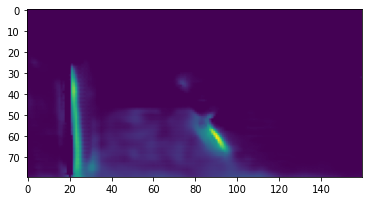

In [ ]:
if(len(prediction.shape)==4):
  plt.imshow(np.squeeze(prediction))
else:
  plt.imshow(prediction)
